<a href="https://colab.research.google.com/github/syedokun/HAD7001/blob/main/Datathon_3/Datathon_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Environment setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
source_df = pd.read_csv('/content/Datathon #3 Dataset - HAD7001.csv')

## EDA

In [ ]:
source_df['apache_3j_bodysystem'].unique()

array(['Sepsis', 'Respiratory', 'Metabolic', 'Cardiovascular', 'Trauma',
       'Neurological', 'Gastrointestinal', 'Genitourinary', nan,
       'Hematological', 'Musculoskeletal/Skin', 'Gynecological'],
      dtype=object)

In [ ]:
source_df['apache_3j_bodysystem'].value_counts()

,count
apache_3j_bodysystem,
Cardiovascular,29999
Neurological,11896
Sepsis,11740
Respiratory,11609
Gastrointestinal,9026
Metabolic,7650
Trauma,3842
Genitourinary,2172
Musculoskeletal/Skin,1166


In [ ]:
cardio_patients = source_df[source_df['apache_3j_bodysystem'] == 'Cardiovascular']
cardio_patients.shape

(29999, 186)

In [ ]:
cardio_patients['hospital_death'].value_counts()

,count
hospital_death,
0,27609
1,2390


In [ ]:
source_df.shape

(91713, 186)

In [ ]:
sepsis_patients = source_df[source_df['apache_3j_bodysystem'] == 'Sepsis']
sepsis_patients.shape

(11740, 186)

In [ ]:
numeric_features = cardio_patients.select_dtypes(include=np.number)
correlation_matrix = numeric_features.corr()

In [ ]:
# Find columns with very high correlation
high_correlation_cols = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.75:
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            high_correlation_cols.append((col1, col2, correlation_matrix.iloc[i, j]))

print("Highly Correlated Columns:")
print("-"*40)
for col1, col2, correlation in high_correlation_cols:
    print(f"{col1} and {col2}: {correlation}")

Highly Correlated Columns:
----------------------------------------
weight and bmi: 0.8612777001471563
apache_3j_diagnosis and elective_surgery: 0.9541654834404075
apache_post_operative and elective_surgery: 0.9541851688085029
apache_post_operative and apache_3j_diagnosis: 0.9999882616101403
gcs_motor_apache and gcs_eyes_apache: 0.879769983704205
gcs_verbal_apache and gcs_eyes_apache: 0.8266556884755977
paco2_for_ph_apache and paco2_apache: 1.0
d1_diasbp_noninvasive_max and d1_diasbp_max: 0.9958081960560672
d1_diasbp_noninvasive_min and d1_diasbp_min: 0.9930203081368403
d1_heartrate_max and heart_rate_apache: 0.7832582176265126
d1_mbp_invasive_min and d1_diasbp_invasive_min: 0.7505708699577679
d1_mbp_max and d1_diasbp_max: 0.8009562511873507
d1_mbp_max and d1_diasbp_noninvasive_max: 0.8088114557260574
d1_mbp_min and d1_diasbp_min: 0.8356975696728498
d1_mbp_min and d1_diasbp_noninvasive_min: 0.8329587326765853
d1_mbp_noninvasive_max and d1_diasbp_max: 0.8284721619476592
d1_mbp_noninvasi

In [ ]:
#Ensuring data was imported and displayed correctly
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
cardio_patients.isnull().sum().sort_values(ascending=False)

,0
h1_lactate_min,28047
h1_lactate_max,28047
h1_bilirubin_max,27675
h1_bilirubin_min,27675
h1_albumin_max,27414
h1_albumin_min,27414
d1_lactate_max,24977
d1_lactate_min,24977
h1_pao2fio2ratio_min,24267
h1_pao2fio2ratio_max,24267


In [ ]:
source_df.columns

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_m

In [ ]:
clean_columns = [
    'age',
    'gender',
    'weight',
    'pre_icu_los_days',
    'pre_icu_los_days',
    'readmission_status',
    'ventilated_apache',
    'd1_heartrate_max',
    'd1_resprate_min',
    'd1_sysbp_max',
    'd1_hemaglobin_max',
    'd1_sodium_max',
    'temp_apache',
    'd1_creatinine_max',
    'd1_bun_max',
    'd1_glucose_max',
    'd1_wbc_max',
    'd1_hco3_max',
    'hospital_death',
    'hepatic_failure',
    'diabetes_mellitus',
    'leukemia',
    'lymphoma',
    'solid_tumor_with_metastasis',
    ]

In [ ]:
cleaned_cardio_df = cardio_patients[clean_columns]

In [ ]:
cleaned_cardio_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,28952.0,65.747859,13.873635,17.00,57.000000,67.000000,76.000000,89.000000
weight,29050.0,86.506177,23.751420,38.60,70.300000,83.600000,99.600000,186.000000
pre_icu_los_days,29999.0,0.918820,2.320779,-0.25,0.042361,0.163194,0.519444,63.044444
pre_icu_los_days,29999.0,0.918820,2.320779,-0.25,0.042361,0.163194,0.519444,63.044444
readmission_status,29999.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
ventilated_apache,29999.0,0.347878,0.476305,0.00,0.000000,0.000000,1.000000,1.000000
d1_heartrate_max,29965.0,98.376272,22.296732,58.00,83.000000,95.000000,110.000000,177.000000
d1_resprate_min,29849.0,12.277932,5.071415,0.00,10.000000,12.000000,15.000000,96.000000
d1_sysbp_max,29950.0,147.499800,26.264671,90.00,129.000000,145.000000,163.000000,232.000000
d1_hemaglobin_max,25698.0,11.738727,2.107864,6.80,10.200000,11.700000,13.200000,17.200000


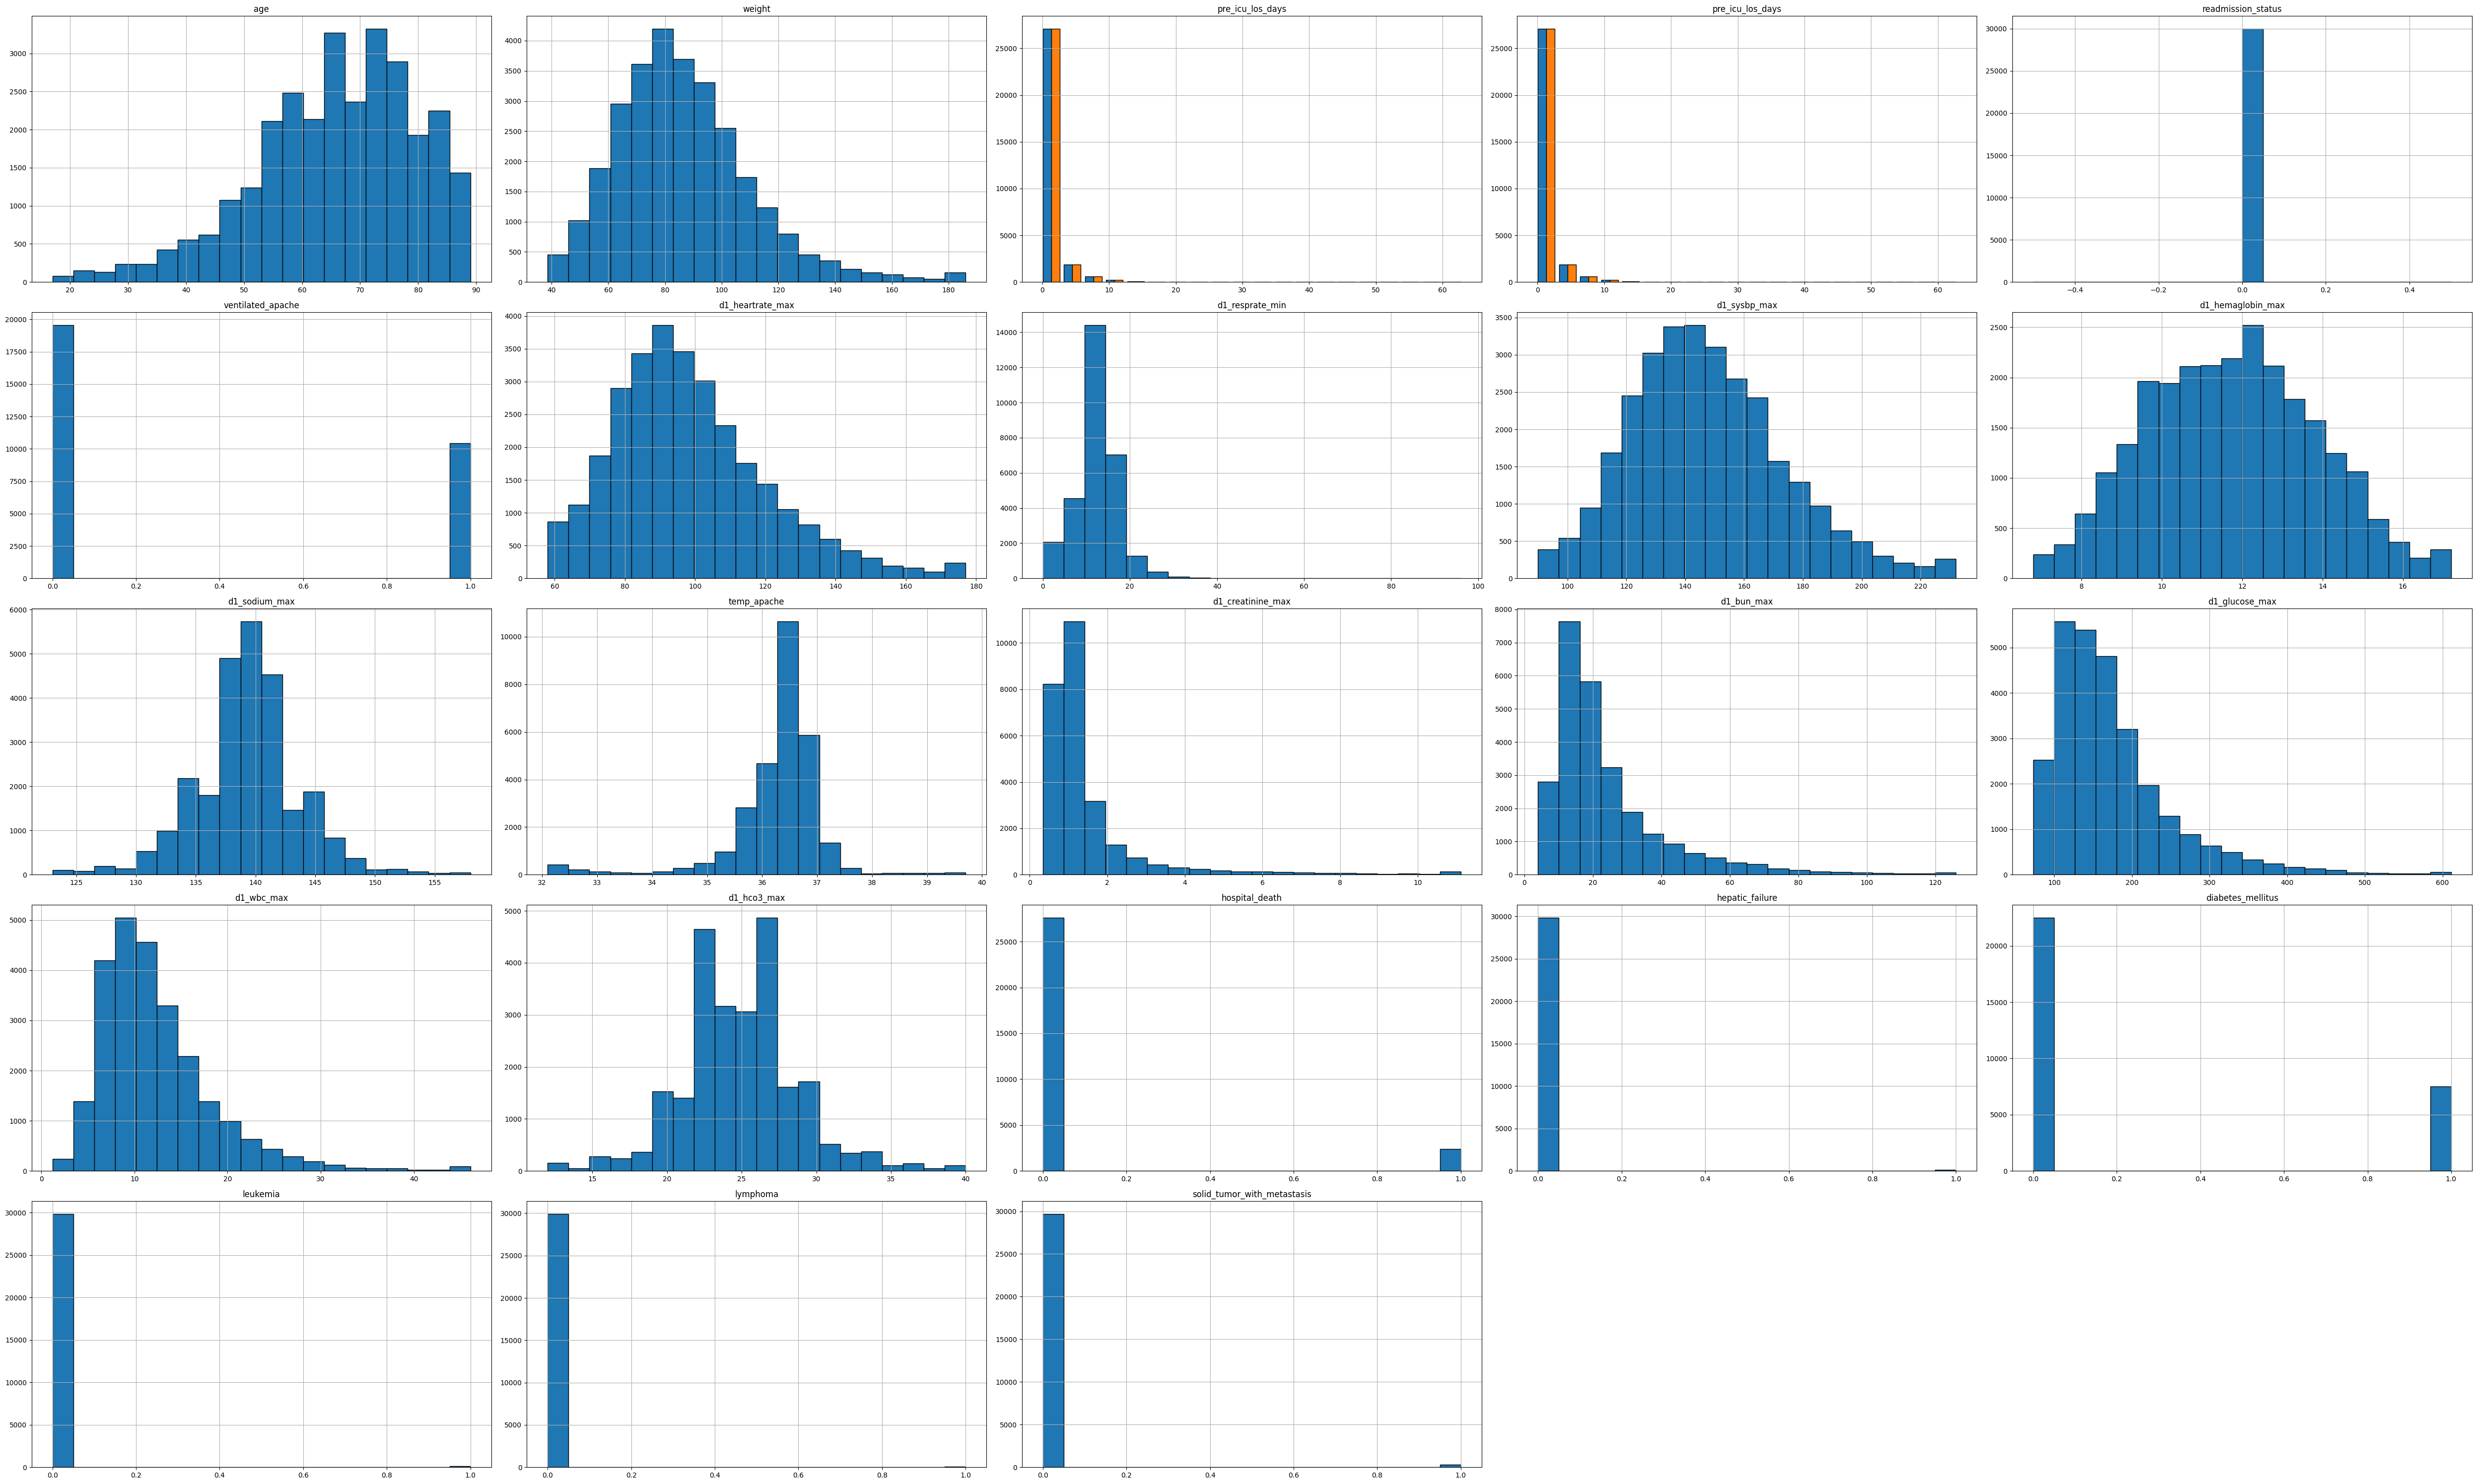

In [ ]:
# Histogram
bins = 20
cleaned_cardio_df.hist(figsize=(50, 30), bins=bins, edgecolor="black")

plt.tight_layout()
plt.show()